# Propose an architecture for the network (the target is binary: digit/non-digit)

In [ ]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
indices_train = np.random.choice(x_train.shape[0], 30000, replace=True)

In [5]:
x_train_mnist_randoms = x_train[indices_train.tolist()]

In [6]:
import random

In [7]:
x_train_uniform_randoms=np.random.uniform(low=0, high=255, size=(30000, 28, 28))
x_test_uniform_randoms = np.random.uniform(low=0, high=255, size=(10000, 28, 28))

In [8]:
x_train=np.concatenate((x_train_mnist_randoms, x_train_uniform_randoms))

In [9]:
x_test=np.concatenate((x_test, x_test_uniform_randoms))

In [10]:
y0_train=np.zeros((30000,1), dtype=int)
y0_test=np.zeros((10000,1), dtype=int)

In [11]:
y1_train=np.ones((30000,1), dtype=int)
y1_test=np.ones((10000,1), dtype=int)

In [12]:
y_train=np.concatenate((y1_train, y0_train))
y_test=np.concatenate((y1_test, y0_test))

In [13]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [14]:
x_test, y_test = shuffle(x_test, y_test)

In [15]:
# -1: the value for this dimension is inferred 
train_X = x_train.reshape(-1, 28,28, 1)
test_X = x_test.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

# convert in float32 (more memory allocated)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# scale to 0-1, note the . after 255 (float)
train_X = train_X / 255.
test_X = test_X / 255.

(60000, 28, 28, 1) (20000, 28, 28, 1)


In [16]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model

batch_size = 1000 # try other values
epochs = 3 # try other values
num_classes = 1

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

In [18]:
import keras

In [19]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer = "sgd",
              metrics='accuracy')

# Illustrate the implemented architectures with text and a diagram

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [21]:
from tensorflow.keras.utils import plot_model

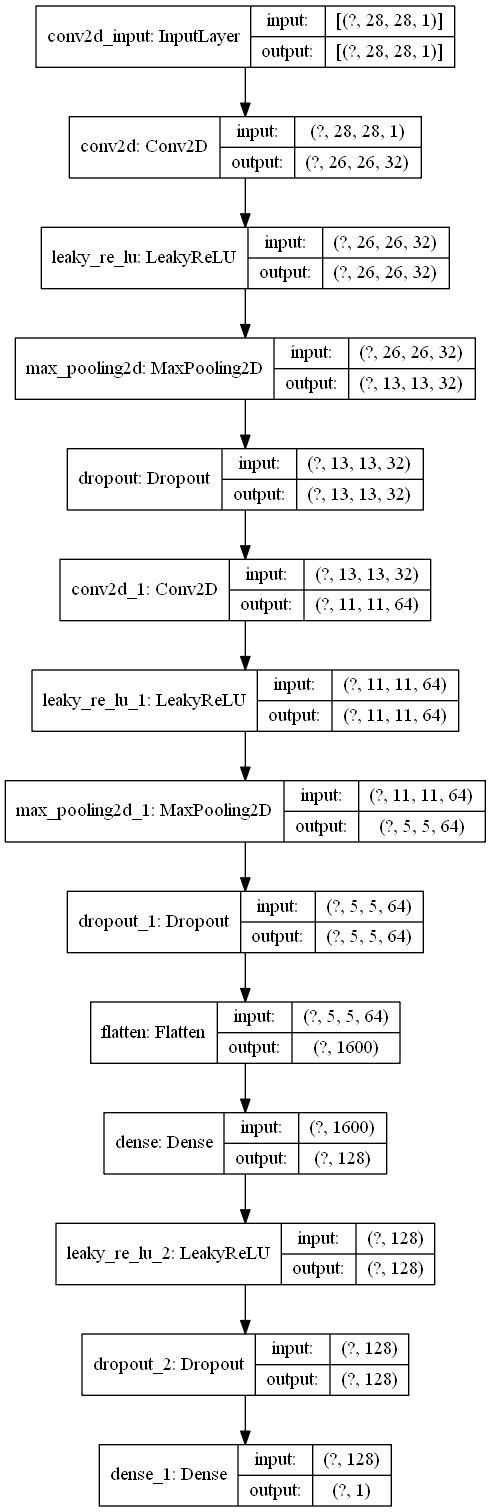

In [22]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the network using 30, 000 images selected randomly from MNIST and 30, 000 “randomly” generated images

In [23]:
model.fit(train_X, y_train, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  verbose=1, 
                  validation_split = 0.2)

Epoch 1/3
48/48 [==============================] - 24s 503ms/step - loss: 0.6279 - accuracy: 0.7418 - val_loss: 0.5286 - val_accuracy: 0.8690
Epoch 2/3
48/48 [==============================] - 24s 495ms/step - loss: 0.4085 - accuracy: 0.9445 - val_loss: 0.2769 - val_accuracy: 0.9662
Epoch 3/3
48/48 [==============================] - 24s 494ms/step - loss: 0.1883 - accuracy: 0.9799 - val_loss: 0.1173 - val_accuracy: 0.9826


In [25]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


# Evaluate the classifier’s performance using the 10, 000 MNIST test images and 10, 000 randomly generated images

In [26]:
test_eval = model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11582625657320023
Test accuracy: 0.9835500121116638


# Propose a vizualization of the classifier’s predictions

In [37]:
import matplotlib.pyplot as plt

In [31]:
pred = model.predict(test_X)

The probability that the image is a digit is : [0.8063327]
The image is a digit


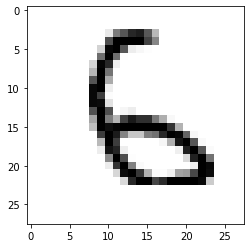

The probability that the image is a digit is : [0.05122325]
 So the image is not a digit


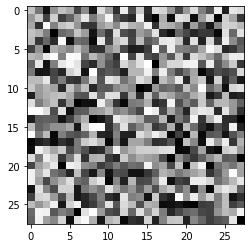

The probability that the image is a digit is : [0.04673997]
 So the image is not a digit


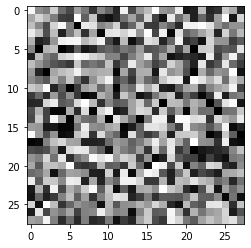

The probability that the image is a digit is : [0.05181873]
 So the image is not a digit


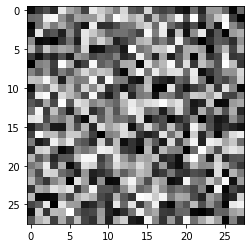

The probability that the image is a digit is : [0.6103432]
The image is a digit


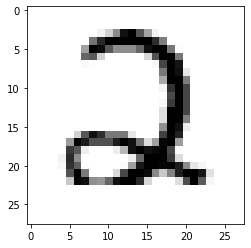

The probability that the image is a digit is : [0.04960057]
 So the image is not a digit


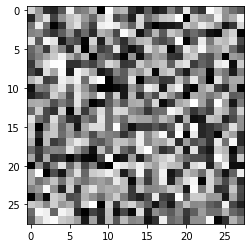

The probability that the image is a digit is : [0.08511358]
 So the image is not a digit


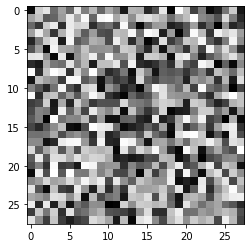

The probability that the image is a digit is : [0.8970989]
The image is a digit


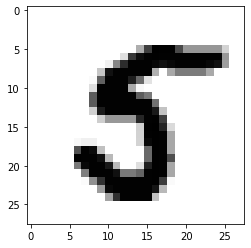

The probability that the image is a digit is : [0.9525445]
The image is a digit


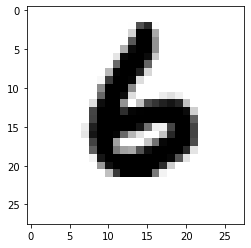

The probability that the image is a digit is : [0.0535281]
 So the image is not a digit


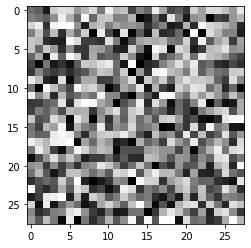

In [53]:
for i in range (1,11):
    prediction=pred[i]
    print(f'The probability that the image is a digit is : {prediction}')
    if prediction <0.5:
        print(f' So the image is not a digit')
    else:
        print('The image is a digit')
    plt.imshow(test_X[i], cmap=plt.cm.binary)
    plt.show()